In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv('train_features.csv')
val_df = pd.read_csv('validation_features.csv')

In [2]:
# Remove empty column '190'
train_df = train_df.drop(columns=['190'])
val_df = val_df.drop(columns=['190'])

In [3]:
# Separate features and labels
X_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

X_val = val_df.drop(columns=['label']).values
y_val = val_df['label'].values

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [5]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Predict on the new test set
val_predictions = rf_model.predict(X_val)

# Classification report
print(classification_report(y_val, val_predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9766    0.9752    0.9759      1413
           1     0.9753    0.9766    0.9760      1413

    accuracy                         0.9759      2826
   macro avg     0.9759    0.9759    0.9759      2826
weighted avg     0.9759    0.9759    0.9759      2826



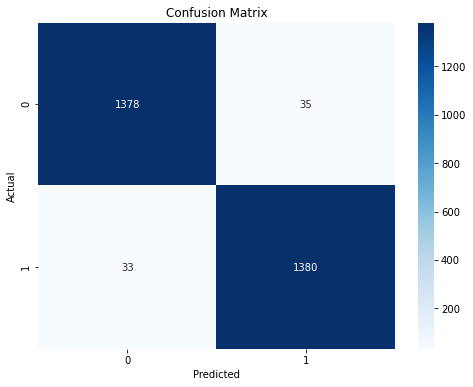

In [27]:
# Confusion matrix
cm = confusion_matrix(y_val, val_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()